
# Probability

## Key Concepts:

### Sample Space

All the possible outcomes of an experiment. Examples:
    - Flip of a coin: Ω = {'Cara','Coroa'}
    - Roll of a dice: Ω = {1,2,3,4,5,6}
    
Omega is the nomenclature for a sample space: <b> Ω = {} </b>

### Event



Subset of our sample space:
- even number of dice $\rightarrow $ <b> A = {2, 4, 6} </b>
    

### Probability

The probability of an event to happen is: 

$$P(event) = \frac{\text{number of outcomes of an event}}{\text{number of outcomes of the sample space}}$$

$$P(A) = \frac{len(A)}{len(Ω)} = \frac{3}{6} = \frac{1}{2} = 50\% $$

### What is the probability of the entire sample space?

$$P(A) = \frac{len(Ω)}{len(Ω)} = 1 = 100\% $$

## Simulating scenarios

In [1]:
import numpy as np

In [2]:
def is_even(x):
    if x % 2 == 0:
        return True
    else:
        return False
    
dice = [1, 2, 3, 4, 5, 6]

dice_rolls = np.random.choice(dice, size=1000000)

count_events = len([item for item in dice_rolls if is_even(item)])
count_rolls  = len(dice_rolls)

print(f'{count_events / count_rolls *100:.1f}%')

50.0%


## Union

Event: 

A = even = {2, 4, 6}<br>
B = greater than 4 = {5, 6}

A U B = {2, 4, 5, 6}

### Mutual Exclusivity

Events that have no intersection: 

Events: even and odd numbers of dice

A = {1, 3, 5}<br>
B = {2, 4, 6}

$ A ∩ B = \{\} $

In [ ]:
# What is the sum of the probability of all mutual exclusive events ?

# P(1) + P(2) + P(3) + ... + P(6) = 100%

Event: 

A = even = {2, 4, 6} <br>
C = less than 4 = {1, 2, 3}

Are they mutually exclusive?

No, because 𝐴∩C = {2}

### Conditional Probability

P(A|B) $\rightarrow$ Probability of event A to happen given that event B happens

$$ P(A|B) = \frac{P(𝐴∩𝐵)}{P(B)} $$

Example:

The probability that a die roll is less than 3 given that it is odd

Sample Space = {1,2,3,4,5,6}

Events:
- A = less than 3 = {1,2}
- B = odd = {1,3,5}

- A ∩ B = {1}

$$ P(A|B) = \frac{P(𝐴∩𝐵)}{P(B)} = \frac{1}{3} $$

-----

## Mounty Hall Problem

In [ ]:
def mounty_hall(decision):
    choices = [1,2,3]
    your_choice = np.random.choice(choices)
    premium = np.random.choice(choices)
    #print(choices, premium)
    # open a door
    cabras = [item for item in choices if item != premium]
    #print(cabras)
    
    # select a cabra from a subset that is not your choice
    door_to_open = np.random.choice([door for door in cabras if door != your_choice])
    
    # remove cabra from choices
    choices.remove(door_to_open)
    doors_remaining = choices
    
    #print(your_choice, premium,  choices, door_to_open)
    
    # switch choices
    doors_remaining.remove(your_choice)
    
    if decision == 'switch':
        final_choice = doors_remaining
    else:
        final_choice = your_choice
        
    #print(final_choice, premium)
    if final_choice == premium:
        return True
    else:
        return False

In [ ]:
import numpy as np
np.mean([mounty_hall('not switch') for i in range(100000)])

# DISCRETE PROBABILITY DISTRIBUTIONS

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## Random Variables

The map of <b>outcomes $\rightarrow$ numbers</b>

Discrete vs Continuous Distributions:

Discrete
- Dice roll
- Nome escolhido aleatoriamente

Continuous
- Renda de um cliente aleatorio
- Peso de um animal do meu dataset

### Discrete Uniform Distribution

In [ ]:
sns.distplot(np.random.randint(0, 100, size=100), kde=False, bins = 100)

In [ ]:
sns.distplot(np.random.randint(0, 100, size=10000000), kde=False, bins = 100)

In [ ]:
megasena = pd.read_csv("https://gist.githubusercontent.com/ikkebr/ce0b74f6d0dbf5a42015/raw/7f5120491feba60906946b56f5b88fb44382f11a/megasena.csv", sep=';')
megasena.head()

In [ ]:
numeros = pd.concat([megasena.D1, 
                     megasena.D2, 
                     megasena.D3, 
                     megasena.D4, 
                     megasena.D5, 
                     megasena.D6]).reset_index(drop=True)
numeros
numeros.hist(bins=20)

In [ ]:
numeros.value_counts(normalize=True).sort_values(ascending=False)

In [ ]:
sns.countplot(x=numeros, color='green', orient='h');

### Bernoulli Distribution


The distribution for 0 and 1 outcomes. If the probability of an event being true is p, then the probability of it being false will be 1-p (because it has to sum 1, remember?)

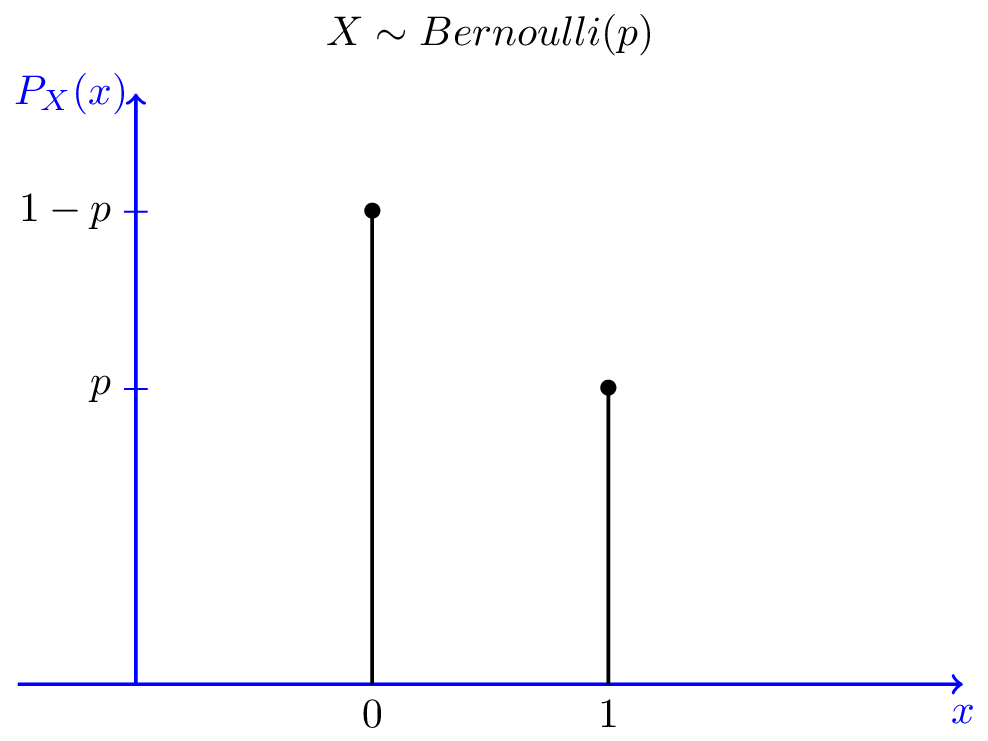

example:

- biased coin

### Binomial Distribution


This is the same as before, except it is now a <b>sequence</b> of events. For instance, imagine you flip a coin twice. 
The binomial distribution represents the probability of obtaining exactly <b>k</b> successes flipping the coin <b>n</b> times.

### The Binomial Distribution in Python


<b>Example: </b>The probability of a biased coin with a 30% chance of heads, being heads 5 times in 10 flips

### PROBABILITY MASS FUNCTION (PMF)

A function that gives the probability that a discrete random variable is <b> exactly </b> equal a  specific value.

For binomial distribution, you create it given:
    $$ binom(n, p)$$ 

In [ ]:
from scipy.stats import binom

# 10 flips
# 0.3 chance of success

dist = binom(10, 0.3)

In [ ]:
# probability of obtaining exactly 5 successes (exactly 5 times == 'HEADS')
dist.pmf(5)

In [ ]:
sns.barplot(x=np.arange(0,11), 
            y=dist.pmf(np.arange(0,11)),
            color='blue')

OR you can simulate this game.

In [ ]:
np.random.choice([0, 1], p=[0.7, 0.3], size=10).sum() == 5

In [ ]:
np.mean([(np.random.choice([0, 1], p=[0.7, 0.3], size=10).sum() == 5) for i in range(10000)])

In [ ]:
from collections import Counter

In [ ]:
# using numpy
np.mean([Counter(np.random.choice(['HEADS','TAILS'], p=[0.3, 0.7], size=10) )['HEADS'] == 5 for j in range(100000)])

In [ ]:
(np.random.binomial(10, 0.3))

In [ ]:
(np.random.binomial(10, 0.3, size=100))

In [ ]:
(np.random.binomial(10, 0.3, size=100) == 5)

In [ ]:
(np.random.binomial(10, 0.3, size=1000000) == 5).mean()

In [ ]:
# plot

sns.distplot(np.random.binomial(10, 0.3, size=1000000), kde=False)

### Geometric Distribution


The geometric distribution describes how many trials are needed before we get an outcome of success (where only 2 outcomes exist - success and failure).

### The Geometric Distribution in Python


<b>Example:</b> The probability that it will take exactly 5 trials to get a first success for a 80% biased coin.

In [ ]:
from scipy.stats import geom
dist = geom(0.8)

dist.pmf(3)

In [ ]:
dist = geom(0.4)

sns.barplot(x=np.arange(0,11), 
            y=dist.pmf(np.arange(0,11)),
            color='blue')

In [ ]:
(np.random.geometric(0.4, size=10000000) == 1).mean()

In [ ]:
sns.distplot(np.random.geometric(0.4, size=1000), kde=False);

# Poisson Distributions

The Poisson distribution is popular for modeling the number of times an event occurs in an interval of time or space.


<b> Example </b>: Imagine you have a dataset and discover that the average number of clients in a fast food is ~5 a minute. 
What is the probability of the fast food receiving 7 new clients on the next minute? 

Conditions for Poisson Distribution:

* An event can occur any number of times during a time period.
* Events occur independently. 
* The rate of occurrence is constant; that is, the rate does not change based on time.
* The probability of an event occurring is proportional to the length of the time period. 

In [ ]:
from scipy.stats import poisson

In [ ]:
average = 5
dist = poisson(average)

In [ ]:
dist.pmf(5)

In [ ]:
dist.pmf(10)

In [ ]:
plt.bar(range(11), dist.pmf(range(11)))

## Example 2

A call center receives an average of 4.5 calls every 5 minutes. Each agent can handle one of these calls over the 5 minute period. If a call is received, but no agent is available to take it, then that caller will be placed on hold. Assuming that the calls follow a Poisson distribution, what is the minimum number of agents needed on duty so that calls are placed on hold at most 10% of the time?

In [ ]:
average = 4.5
dist = poisson(average)

$ P(\text{numero de ligacoes} > \text{telefonistas}) \le 10\% $

OU

$ P(\text{numero de ligacoes} \le \text{telefonistas}) > 90\% $

Probabilidade do número de ligações ser igual a zero:

In [ ]:
dist.pmf(0)

$P(X = 0) = 0.011$<br>

Probabilidade do número de ligações ser igual a 1:
    

In [ ]:
dist.pmf(1)

$P(X = 1) = 0.050$

Qual a probabilidade então do número de ligações ser $\le$ 1

In [ ]:
dist.pmf(0) + dist.pmf(1) + dist.pmf(2) + dist.pmf(3)

In [ ]:
dist.cdf(7)

$P(X = 0) = 0.011$<br>
$P(X = 1) = 0.050  \rightarrow P(X \le 1) = 0.066 $<br>
$P(X = 2) = 0.112  \rightarrow P(X \le 2) = 0.173 $<br>
$P(X = 3) = 0.168  \rightarrow P(X \le 3) = 0.342 $<br>
$P(X = 4) = 0.190  \rightarrow P(X \le 4) = 0.532 $<br>
$P(X = 5) = 0.170  \rightarrow P(X \le 5) = 0.703 $<br>
$P(X = 6) = 0.128  \rightarrow P(X \le 6) = 0.831 $<br>
$P(X = 7) = 0.082  \rightarrow P(X \le 7) = 0.913 $<br>

# Cumulative distribution function

In [ ]:
average = 4.5
dist = poisson(average)

# cumulative distribution function
dist.cdf(10)

# Normal Distribution

In [ ]:
from scipy.stats import norm

dist = norm()

In [ ]:
dist.pdf(0)

In [ ]:
dist.cdf(0)

In [ ]:
dist.cdf(1)

In [ ]:
dist.cdf(1) - dist.cdf(-1)

In [ ]:
dist.cdf(2) - dist.cdf(-2)

In [ ]:
dist.cdf(3) - dist.cdf(-3)

# Example World Cup

In [ ]:
## Probabilidade de se fazer 7 gols em 1 jogo de copa do mundo?
df = pd.read_csv('WorldCupMatches.csv')

In [ ]:
df.dropna().query('Year == 2014.0').query('`Away Team Name` == "Brazil"')

In [ ]:
df.sample(10)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df['total_goals'] = df['Away Team Goals'] + df['Home Team Goals']

In [ ]:
df['Away Team Goals']

In [ ]:
team_name = 'Brazil'

other_team = 'Germany'

In [ ]:
df.query(f'`Home Team Name` == "{team_name}" and `Away Team Name` == "{other_team}"')

In [ ]:
 pd.concat([df.query(f'`Home Team Name` == "{team_name}" and `Away Team Name` == "{other_team}"')['Home Team Goals'], 
                     df.query(f'`Away Team Name` == "{team_name}" and `Home Team Name` == "{other_team}"')['Away Team Goals']])

In [ ]:
average = pd.concat([df.query(f'`Home Team Name` == "{team_name}" and `Away Team Name` == "{other_team}"')['Home Team Goals'], 
                     df.query(f'`Away Team Name` == "{team_name}" and `Home Team Name` == "{other_team}"')['Away Team Goals']]).mean()
average

In [ ]:
average

In [ ]:
dist = poisson(average)

In [ ]:
# de quantos em quantos jogos eu faço 7 gols

100 / (dist.pmf(7) * 100)

In [ ]:
(dist.pmf(7) * 100)

Of course, we're breaking some of the hypothesis. But that gives us an idea.


Listen to this podcast to hear some interesting applications of the Poisson distribution!

http://lineardigressions.com/episodes/2018/10/21/better-know-a-distribution-the-poisson-distribution